# Practical task 2

In [1]:
import pandas as pd
# import datetime

from sklearn.model_selection import train_test_split # to split the data
from sklearn.tree import DecisionTreeClassifier # criamos nosso modelo básico de árvore de classificação
from sklearn.metrics import accuracy_score # to evaluate the accuracy
from sklearn import tree
from sklearn.metrics import confusion_matrix # to evaluate the confusion matrix
from sklearn.metrics import matthews_corrcoef # to evaluate the MCC

import matplotlib.pyplot as plt # data visualization

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/renatoquiliche/DataScience-PUCRio-FB/main/Data/DS_salarios/ds_salaries.csv")
df.drop(columns = ["Unnamed: 0"], errors = "ignore",inplace = True)

### Pre-processing
1. Transform the categorical features into binary variables (dummy variables). Dummy variables are accepted by almost any classifier. (1 point)

In [3]:
def faixas(remote_ratio): 
    if remote_ratio == 0:        
        return 'remote_no'
    elif remote_ratio == 50:        
        return 'remote_partially'    
    elif remote_ratio == 100:  
        return 'remote_fully'

df['remote'] = df['remote_ratio'].map(faixas)

In [4]:
def faixas(work_year): 
    if work_year == 2022:        
        return 1
    else:
        return 0

df['ano_recente'] = df['work_year'].map(faixas)

In [5]:
# df

In [6]:
df.drop(columns = ['work_year', 'work_month', 'data', 'salary','salary_currency','remote_ratio','employee_residence','company_location'], errors = "ignore",inplace = True)

In [7]:
df

,experience_level,employment_type,job_title,salary_in_usd,company_size,remote,ano_recente
0,MI,FT,Data Scientist,79833,L,remote_no,0
1,SE,FT,Machine Learning Scientist,260000,S,remote_no,0
2,SE,FT,Big Data Engineer,109024,M,remote_partially,0
3,MI,FT,Product Data Analyst,20000,S,remote_no,0
4,SE,FT,Machine Learning Engineer,150000,L,remote_partially,0
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,154000,M,remote_fully,1
603,SE,FT,Data Engineer,126000,M,remote_fully,1
604,SE,FT,Data Analyst,129000,M,remote_no,1
605,SE,FT,Data Analyst,150000,M,remote_fully,1


In [8]:
df.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_in_usd',
       'company_size', 'remote', 'ano_recente'],
      dtype='object')

In [9]:
df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [10]:
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [11]:
df.job_title.unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [12]:
df.remote.unique()

array(['remote_no', 'remote_partially', 'remote_fully'], dtype=object)

In [13]:
# Dummies

experience_level = pd.get_dummies(df["experience_level"])
employment_type = pd.get_dummies(df["employment_type"])
job_title = pd.get_dummies(df["job_title"])
remote = pd.get_dummies(df["remote"])

In [14]:
df_dummy = df.join(experience_level).join(employment_type).join(job_title).join(remote)
df_dummy.drop(columns = ['experience_level', 'employment_type','job_title','remote'], errors = "ignore",inplace = True)

In [15]:
df_dummy

,salary_in_usd,company_size,ano_recente,EN,EX,MI,SE,CT,FL,FT,...,NLP Engineer,Principal Data Analyst,Principal Data Engineer,Principal Data Scientist,Product Data Analyst,Research Scientist,Staff Data Scientist,remote_fully,remote_no,remote_partially
0,79833,L,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,260000,S,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,109024,M,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,20000,S,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,150000,L,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,154000,M,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
603,126000,M,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
604,129000,M,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
605,150000,M,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df_dummy.columns

Index(['salary_in_usd', 'company_size', 'ano_recente', 'EN', 'EX', 'MI', 'SE',
       'CT', 'FL', 'FT', 'PT', '3D Computer Vision Researcher', 'AI Scientist',
       'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Scientist', 'BI Data Analyst',
       'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst',
       'Cloud Data Engineer', 'Computer Vision Engineer',
       'Computer Vision Software Engineer', 'Data Analyst',
       'Data Analytics Engineer', 'Data Analytics Lead',
       'Data Analytics Manager', 'Data Architect', 'Data Engineer',
       'Data Engineering Manager', 'Data Science Consultant',
       'Data Science Engineer', 'Data Science Manager', 'Data Scientist',
       'Data Specialist', 'Director of Data Engineering',
       'Director of Data Science', 'ETL Developer', 'Finance Data Analyst',
       'Financial Data Analyst', 'Head of Data', 'Head of Data Science',
       'Head of Machine Learning', 'Lead Data Analyst', 'Lead

### Processing
2. Fit a Decision Tree to classify the size of company in which each data scientist work. This is represented by the feature ‘company_size’, which is the target variable. (3 points)

    2.1. Set the maximum depth of the tree to 3. (1 point)

    2.2. Plot the decision tree. (2 point)

3. Interpret the results of the decision tree (3 points)

    3.1. Write a paragraph interpreting the structure of the decision tree.

In [17]:
y = df_dummy['company_size']

In [18]:
x = df_dummy.drop(['company_size'], axis=1)

In [19]:
# Divisão em treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)

In [20]:
x_train.shape, x_test.shape

((424, 63), (183, 63))

In [21]:
# y
# x
# x_train
# x_test
# y_train
# y_test

In [22]:
# criamos nosso modelo básico de árvore de classificação -clf_gini
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [23]:
# treinamos nossa árvore em nossos dados reservados para treinamento (x_train e y_train)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
# damos ao nosso modelo dados que ele nunca viu antes
predictions = model.predict(x_test)

In [25]:
predictions.size

183

In [26]:
predictions

array(['M', 'L', 'M', 'M', 'L', 'L', 'M', 'M', 'L', 'M', 'M', 'M', 'L',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'L', 'M', 'L', 'M',
       'L', 'L', 'L', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'M', 'M', 'M',
       'M', 'L', 'L', 'L', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'M', 'M',
       'M', 'M', 'M', 'L', 'M', 'M', 'L', 'L', 'L', 'L', 'M', 'L', 'M',
       'M', 'L', 'L', 'M', 'L', 'M', 'M', 'M', 'L', 'L', 'L', 'L', 'L',
       'M', 'L', 'M', 'M', 'M', 'M', 'L', 'M', 'M', 'L', 'M', 'L', 'M',
       'L', 'L', 'L', 'M', 'L', 'L', 'M', 'L', 'L', 'M', 'L', 'L', 'M',
       'M', 'M', 'M', 'L', 'L', 'M', 'L', 'M', 'L', 'L', 'L', 'M', 'M',
       'M', 'M', 'M', 'L', 'L', 'M', 'L', 'M', 'M', 'L', 'L', 'L', 'L',
       'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'L', 'M', 'M', 'M', 'L',
       'M', 'M', 'L', 'M', 'L', 'M', 'M', 'L', 'L', 'M', 'M', 'L', 'L',
       'L', 'L', 'L', 'M', 'M', 'L', 'M', 'L', 'M', 'L', 'M', 'L', 'L',
       'M', 'M', 'M', 'M', 'L', 'M', 'M', 'L', 'M', 'M', 'M', 'L

In [27]:
y_test

575    M
52     S
530    M
345    M
55     M
      ..
504    M
354    M
495    M
452    L
224    L
Name: company_size, Length: 183, dtype: object

In [28]:
y_train.value_counts()

M    233
L    137
S     54
Name: company_size, dtype: int64

In [29]:
model.feature_importances_

array([0.11370652, 0.70842254, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0162593 , 0.        ,
       0.        , 0.        , 0.        , 0.06149657, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03871261, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06140246])

In [30]:
x_train.columns
#ano recente desempenha papel mais significativo na identificação do tamanho da empresa

Index(['salary_in_usd', 'ano_recente', 'EN', 'EX', 'MI', 'SE', 'CT', 'FL',
       'FT', 'PT', '3D Computer Vision Researcher', 'AI Scientist',
       'Analytics Engineer', 'Applied Data Scientist',
       'Applied Machine Learning Scientist', 'BI Data Analyst',
       'Big Data Architect', 'Big Data Engineer', 'Business Data Analyst',
       'Cloud Data Engineer', 'Computer Vision Engineer',
       'Computer Vision Software Engineer', 'Data Analyst',
       'Data Analytics Engineer', 'Data Analytics Lead',
       'Data Analytics Manager', 'Data Architect', 'Data Engineer',
       'Data Engineering Manager', 'Data Science Consultant',
       'Data Science Engineer', 'Data Science Manager', 'Data Scientist',
       'Data Specialist', 'Director of Data Engineering',
       'Director of Data Science', 'ETL Developer', 'Finance Data Analyst',
       'Financial Data Analyst', 'Head of Data', 'Head of Data Science',
       'Head of Machine Learning', 'Lead Data Analyst', 'Lead Data Engineer',

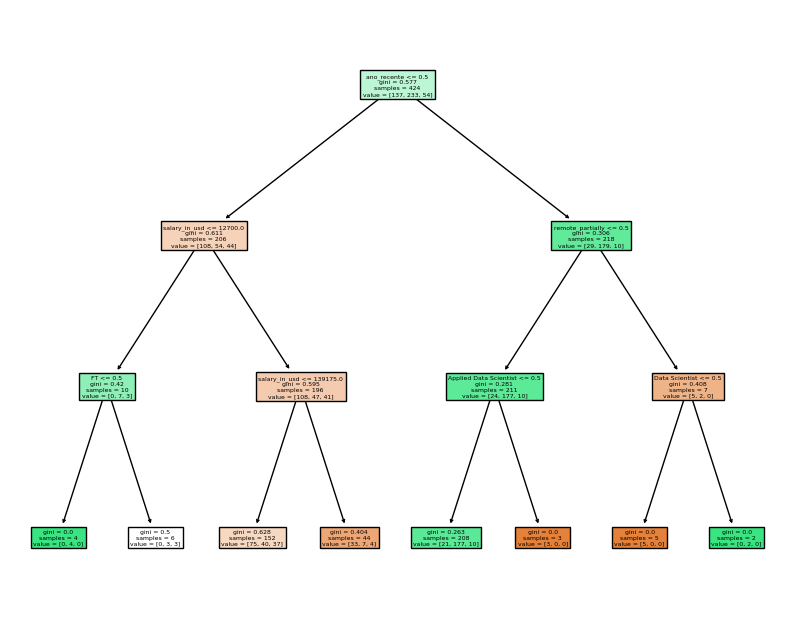

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=100)
plot_tree(model, feature_names=x.columns,filled=True);

## árvore divida com os nós: 
    - ano_recente <= 0.5  (49%true, 51%false), 
      - salary_in_usd <= 12700 (5%true, 95%false),remote_partially <= 0,5 (10%true, 90%false), 
        - FT <= 0.5 (40%true, 60%false), salary_in_usd <= 13917 (0.8%true, 0.2%false), Applied Data Scientist <= 0.5 (0.99%true, 0.01%false) e Data Scientist <= 0.5(0.7%true, 0.3%false)


### Post-processing

4. Measure the performance of the decision tree to make accurate predictions.

    4.1. By hold-out cross-validation performance (3 points)

        4.1.1.Estimate the accuracy, interpret the results. (1.5 points)

        4.1.2.Estimate the Matthews correlation coefficient, interpret the results (1.5 points)

In [34]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score with criterion gini index: 0.6831


68% de acerto na divisão da árvore

In [35]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[45 16  0]
 [13 80  0]
 [22  7  0]]


In [37]:
matthews_corrcoef(y_test, predictions)

0.4603780019799986

46% de qualidade nas classificações para o tamanho da empresa